# Risk Analytics in Banking & Financial Services
> This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. By using the given dataset we need to identify the risky applicants and to minimise the risk of losing money while lending to customers.

## Table of Contents
* **[General Information](#1)**
* **[Technologies Used](#2)**
* **[Importing_Libraries](#3)**
* **[Reading_the_Dataset](#4)**
* **[Sanity_Checks](#5)**
* **[Data_Segregation](#6)**
* **[Univariate_Analysis](#7)**
* **[Segmented_Univariate_Analysis](#8)**
* **[Bivariate_Analysis](#9)**

<!-- You can include any other section that is pertinent to your problem -->

<a id="1"> </a>
# General Information

The term risk analysis refers to the assessment process that identifies the potential for any adverse events that may negatively affect organizations and the environment. Risk analysis is commonly performed by corporations (banks, construction groups, health care, etc.), governments, and nonprofits. Conducting a risk analysis can help organizations determine whether they should undertake a project or approve a financial application, and what actions they may need to take to protect their interests. This type of analysis facilitates a balance between risks and risk reduction. Risk analysts often work in with forecasting professionals to minimize future negative unforeseen effects.

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

<a id="2"> </a>
# Technologies Used
- Numpy
- Pandas
- Seaborn
- Matplotlib

<!-- As the libraries versions keep on changing, it is recommended to mention the version of library used in this project -->


## Contact
Created by [@Shub2204] - feel free to contact me!

<a id="3"> </a>
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="4"> </a>
# Reading the Dataset

In [2]:
# Read the dataset 
df1 = pd.read_csv(r'C:\Users\shubh\OneDrive\Documents\loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<a id="5"> </a>
# Sanity Checks

In [4]:
# Checking the shape of file
df1.shape

(39717, 111)

In [5]:
#Checking the no. of columns having all null values.These columns is of no use as we are not getting any information from it
(df1.isnull().sum()==39717).value_counts()

False    57
True     54
dtype: int64

**Out of 111 columns 54 columns are having null values in it, so we need to drop those columns**

In [6]:
# Dropping the identified columns having all null value records
df1.dropna(axis=1, how='all',inplace=True)

In [7]:
# Verifying the columns are dropped
df1.shape

(39717, 57)

In [8]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [10]:
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


**Removing columns having 0s in the whole column**

In [11]:
df1.columns[(df1==0).all()]

Index(['acc_now_delinq', 'delinq_amnt'], dtype='object')

In [12]:
# Dropping the columns as it has all 0s or null value which adds no information
# Dropping URL as it is not adding any useful information for analysis
# Dropping desc as it has no use for eda analysis but can be usedful in case of text analytics or NLP
df1.drop(['acc_now_delinq','delinq_amnt','url','desc']
         ,axis=1,inplace=True)  #'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'

In [13]:
df1.shape

(39717, 53)

**Final check and removing columns having missing values >90% of total data**

In [14]:
(df1.isnull().sum()/len(df1))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000


In [15]:
# Removing columns having missing values > 90%
df1.drop(['mths_since_last_record','next_pymnt_d'],axis=1,inplace=True) 

In [16]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [17]:
# To check null values row wise
(df1.isnull().sum(axis=1) >6).value_counts()

False    39717
dtype: int64

## Checking for data types 

In [18]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_l

## Converting to proper Datatypes

In [19]:
# Removing % to convert object to float data type
df1['int_rate'] = df1['int_rate'].str.replace('%','')
df1['revol_util'] = df1['revol_util'].str.replace('%','')

In [20]:
# Changing the data types where ever required
df1 = df1.astype({"int_rate":'float', "revol_util":'float'})

In [21]:
# Converting the data to month-year datetime format
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format= '%b-%y')
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format= '%b-%y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format= '%b-%y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format= '%b-%y')

In [22]:
df1.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti       

In [24]:
df1['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [25]:
# Extracting the numeric part from emp_length and changing its dtype
import re
df1 = df1[~df1['emp_length'].isnull()]
df1['emp_length'] = df1['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df1['emp_length'] = df1['emp_length'].apply(lambda x: pd.to_numeric(x))

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38642 non-null  int64         
 1   member_id                   38642 non-null  int64         
 2   loan_amnt                   38642 non-null  int64         
 3   funded_amnt                 38642 non-null  int64         
 4   funded_amnt_inv             38642 non-null  float64       
 5   term                        38642 non-null  object        
 6   int_rate                    38642 non-null  float64       
 7   installment                 38642 non-null  float64       
 8   grade                       38642 non-null  object        
 9   sub_grade                   38642 non-null  object        
 10  emp_title                   37202 non-null  object        
 11  emp_length                  38642 non-null  int64     

<a id="6"> </a>
# Data Segregation

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

There are broadly **3** types of variables –

- Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
- Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
- Customer behavior variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).


In [27]:
cust_b_var =  ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
 "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
 "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]

**Now, the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. So, drop these columns**

In [28]:
df2 = df1.drop(cust_b_var, axis=1)

In [29]:
df2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [30]:
# Since there is no use of variable such as title, zip_code and address state so dropping these 2 column as well
df2.drop(['title','zip_code','addr_state'],axis=1,inplace=True)

**Now moving towards our Target variable i.e. Loan Status. The ones marked 'current' are neither fully paid not defaulted, so remove the current loans. Also, tag the other two values as 0 or 1 to make your analysis simple and clean.**

In [31]:
df2['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [32]:
# Filtering 'current' marked loan status and tagging other two values as 0 or 1
df2 = df2[df2['loan_status'] != 'Current']
df2['loan_status'] = df2['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [33]:
df2.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                             int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                            int64
pymnt_plan                            object
purpose                               object
dti                                  float64
mths_since_last_delinq               float64
initial_list_status                   object
collection

In [34]:
# checking the value counts for loan status
df2['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [35]:
df2['loan_status'].value_counts(normalize=True)*100

0    85.61954
1    14.38046
Name: loan_status, dtype: float64

<a id="7"> </a>
# Univariate Analysis

### Loan Status

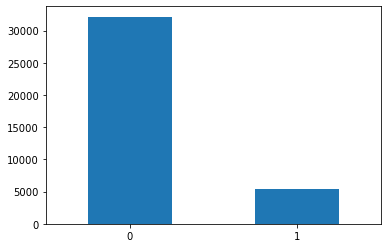

In [36]:
df2['loan_status'].value_counts().plot(kind='bar')
plt.xticks(rotation=0) 
plt.show()

So as we can see that ~14.4 of the total population are defaulters.

In [37]:
def stacked_bar(df,var1,var2):
    gd1 = df.groupby(var1)[var2].value_counts(normalize=True)*100
    plt.rcParams['figure.figsize']=(15,7)
    # Reshape the data into a pivot table for plotting
    pivot = gd1.unstack()

    # Create a stacked bar plot
    pivot.plot(kind='bar', stacked=True)

    # Add labels and a legend
    plt.xlabel('var1')
    plt.ylabel('var2')
    plt.title('{} Vs {}'.format(var1,var2))
    plt.legend(title='Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
    print(df.groupby(var1)[var2].value_counts(normalize=True)*100)

### Grade

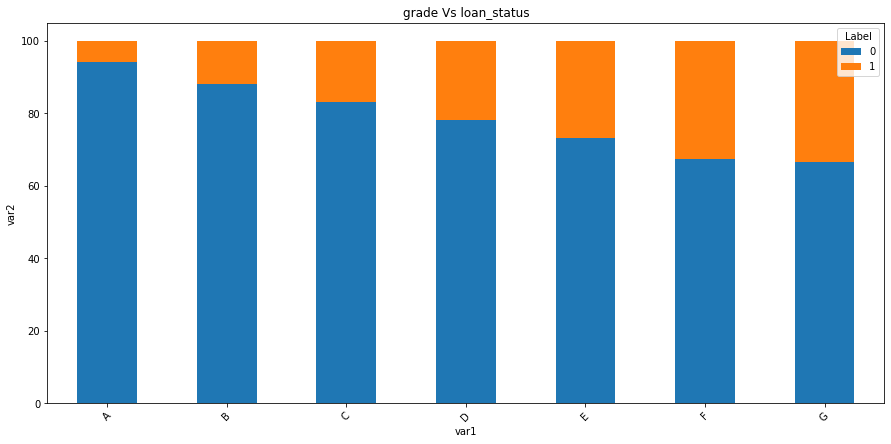

grade  loan_status
A      0              94.223602
       1               5.776398
B      0              88.071133
       1              11.928867
C      0              83.205111
       1              16.794889
D      0              78.208476
       1              21.791524
E      0              73.282443
       1              26.717557
F      0              67.361835
       1              32.638165
G      0              66.442953
       1              33.557047
Name: loan_status, dtype: float64


In [38]:
stacked_bar(df2,'grade','loan_status')

**Interpretation:** So, as we can see as the grade value is deteriorating from A to G, the risk of defaulters is increasing.

### Sub Grade

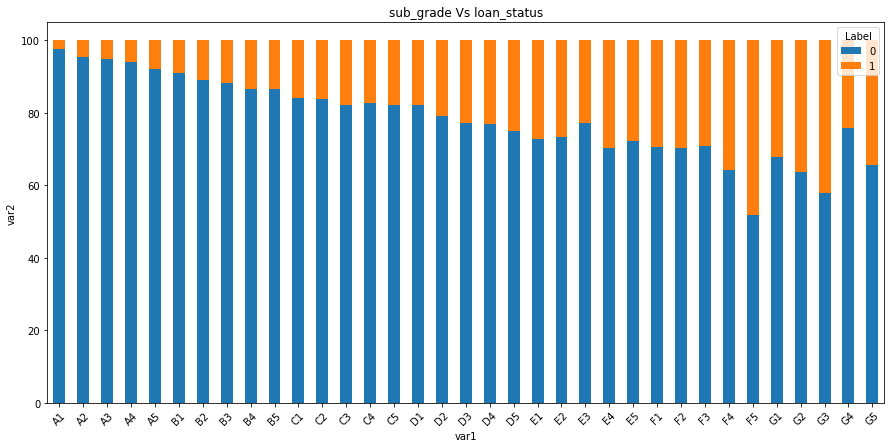

sub_grade  loan_status
A1         0              97.718631
           1               2.281369
A2         0              95.281055
           1               4.718945
A3         0              94.830557
                            ...    
G3         1              42.222222
G4         0              75.925926
           1              24.074074
G5         0              65.517241
           1              34.482759
Name: loan_status, Length: 70, dtype: float64


In [39]:
stacked_bar(df2,'sub_grade','loan_status')

**Interpretation:** So, as we can see as the sub grade value is also deteriorating in grade wise i.e. from A1 to A5, the risk of defaulters is increasing and so on in other grades too (except G4 and G5)

In [40]:
def bar_plot(df,var1,var2):
    sns.barplot(x=var1, y=var2, data=df)
    plt.xticks(rotation=45)
    plt.show()

### Home Ownership

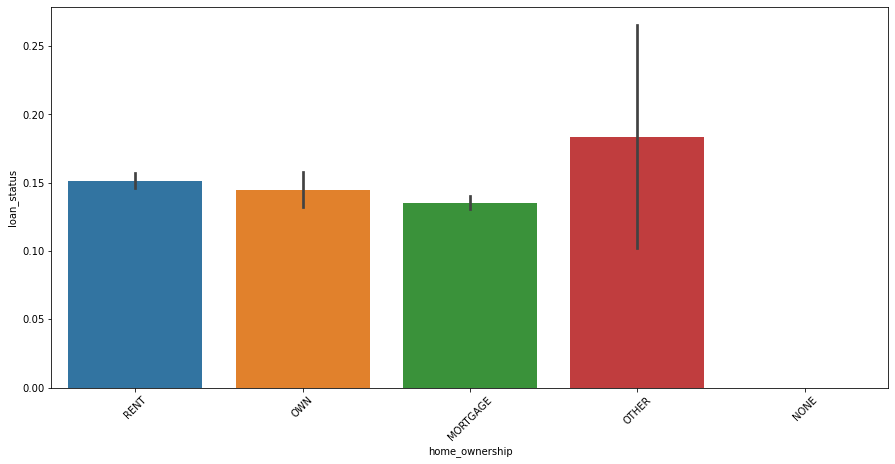

In [41]:
bar_plot(df2,'home_ownership','loan_status')

**Interpretation:** There is not any significant indication from the home_ownership category.

### Purpose

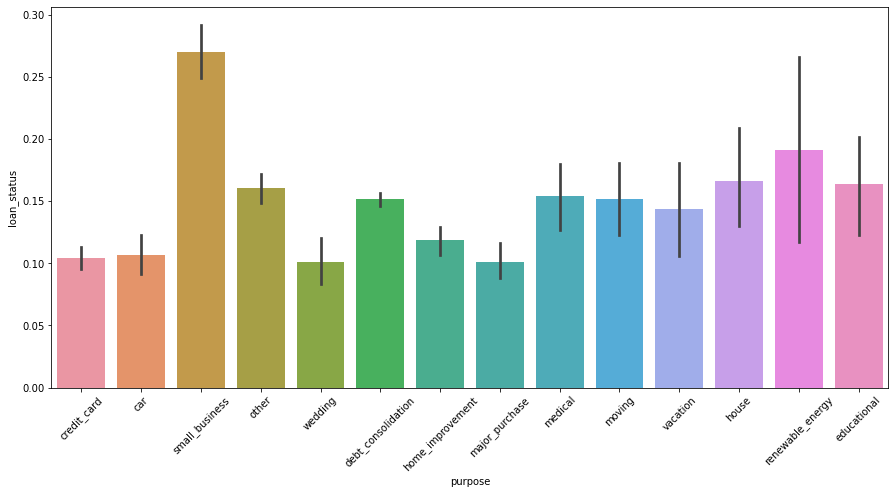

In [42]:
bar_plot(df2,'purpose','loan_status')

**Interpretation:** There is higher chance for default if the purpose of loan is for **small_business**

### Verification Status

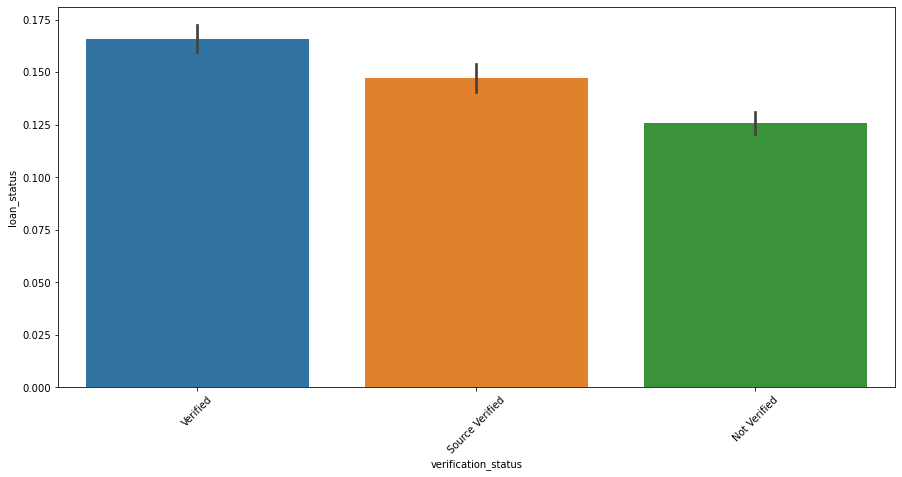

In [43]:
bar_plot(df2,'verification_status','loan_status')

**Interpretation:** Verified loans has the higher chances of getting default. Should improvise or bring new rules for the verification process.

### Loan Amount

Now let's check the median of loan amount and its distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


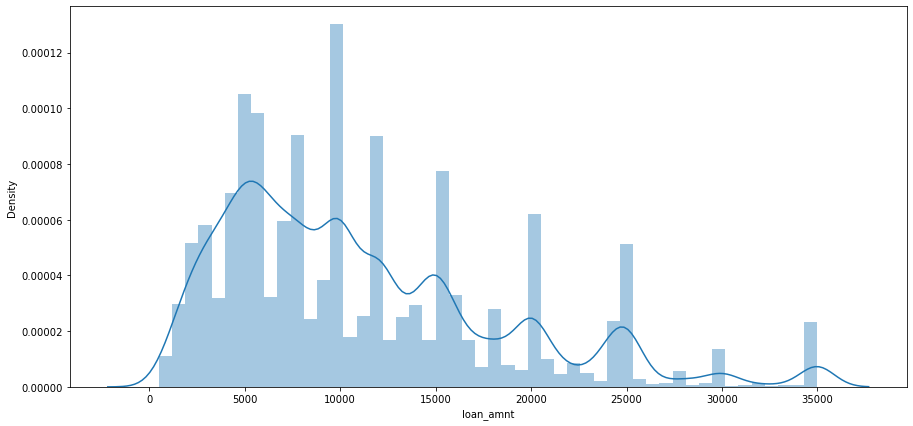

In [44]:
sns.distplot(df2['loan_amnt'])
plt.show()

So, as we can see that the median of loan amount is ~10,000

Now let's divide the loan_amount in different groups i.e.
- low
- medium
- high
- very high

In [45]:
# Define a function to categorize loan amount based on if-else statements
def loan_amount(amount):
    if amount <= 7000:
        return 'Low'
    elif amount <= 14000:
        return 'Medium'
    elif amount <= 25000:
        return 'High'
    else:
        return 'Very high'

df2['loan_amnt_c'] = df2['loan_amnt'].apply(lambda x: loan_amount(x))

# Print the updated DataFrame
print(df2['loan_amnt_c'].value_counts())

Low          13742
Medium       13014
High          9376
Very high     1412
Name: loan_amnt_c, dtype: int64


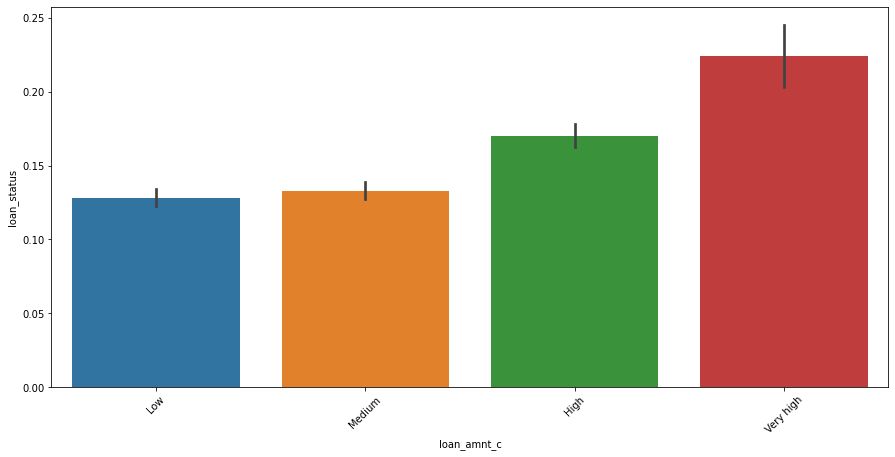

In [46]:
bar_plot(df2,'loan_amnt_c','loan_status')

**Interpretation:** Higher is the risk to default with the very high loan amount.

### Funded Amount

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


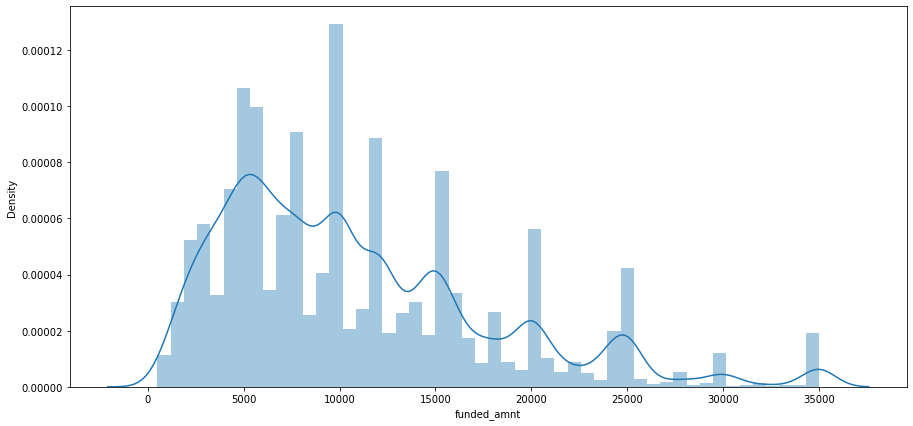

In [47]:
sns.distplot(df2['funded_amnt'])
plt.show()

In [48]:
# Define a function to categorize loan amount based on if-else statements
def funded_amount(amount):
    if amount <= 5000:
        return 'Low'
    elif amount <= 15000:
        return 'Medium'
    else:
        return 'High'

df2['funded_amnt_c'] = df2['funded_amnt'].apply(lambda x: funded_amount(x))

# Print the updated DataFrame
print(df2['funded_amnt_c'].value_counts())

Medium    20377
Low        9136
High       8031
Name: funded_amnt_c, dtype: int64


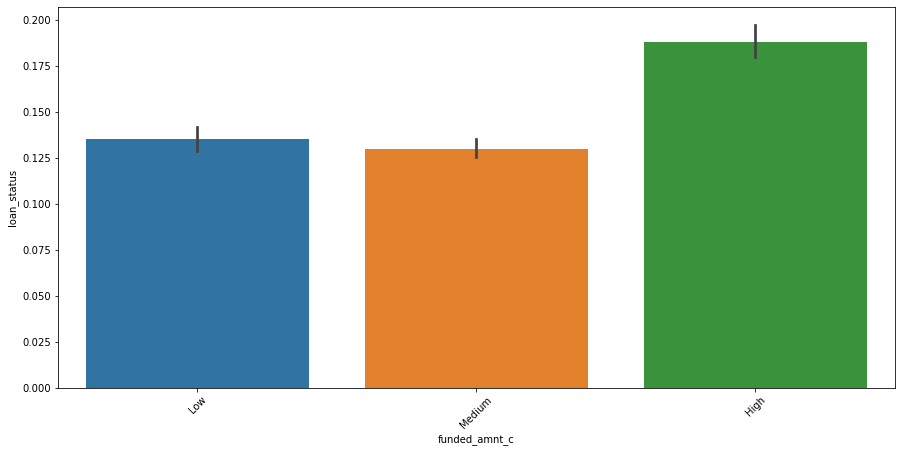

In [49]:
bar_plot(df2,'funded_amnt_c','loan_status')

**Interpretation:** Higher is the risk to default with high funded loan amount.

### Interest Rate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


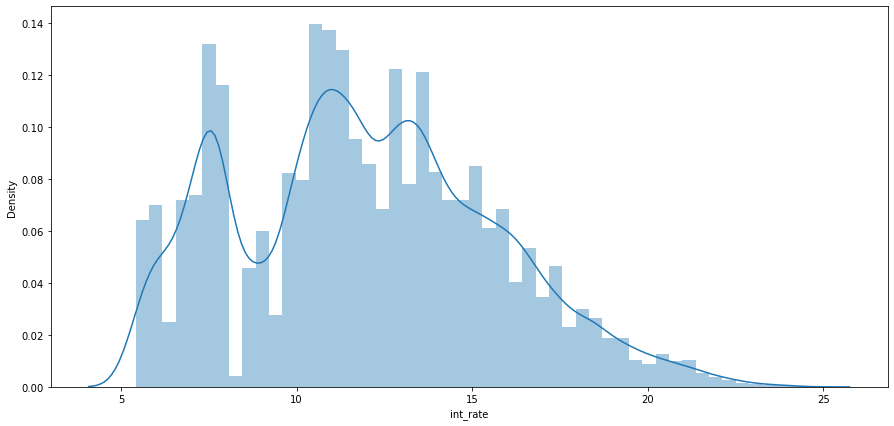

In [50]:
sns.distplot(df2['int_rate'])
plt.show()

So, as we can see the median of interest rate is ~12%.

Dividing into 3 classes:
- Low 
- Medium
- High

In [51]:
# converting interest rate to low, medium, high
def int_rate(n):
    if n<= 9:
        return 'low'
    elif n<=15:
        return 'medium'
    else:
        return 'high'
    
    
df2['int_rate_c'] = df2['int_rate'].apply(lambda x: int_rate(x))

# Print the updated DataFrame
print(df2['int_rate_c'].value_counts())

medium    20301
low        9413
high       7830
Name: int_rate_c, dtype: int64


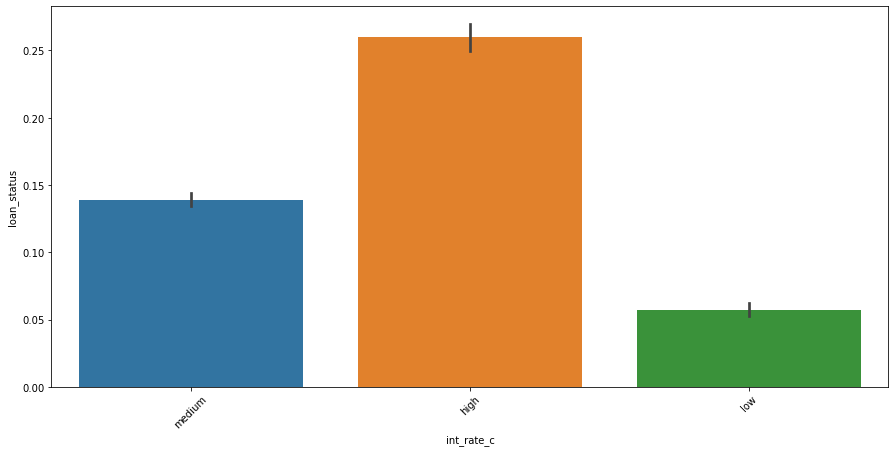

In [52]:
bar_plot(df2,'int_rate_c','loan_status')

**Interpretation:** With high interest rate, there is higher risk of getting defaults.

### Installment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


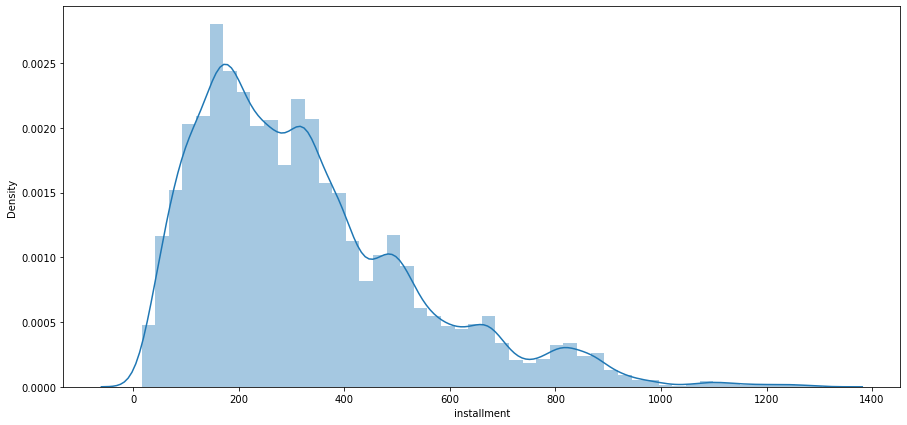

In [53]:
sns.distplot(df2['installment'])
plt.show()

In [54]:
def installment(n):
    if n<= 200:
        return 'low'
    elif n<=400:
        return 'medium'
    elif n<=600:
        return 'high'
    else:
        return 'very high'
    
df2['installment_c'] = df2['installment'].apply(lambda x: installment(x))

# Print the updated DataFrame
print(df2['installment_c'].value_counts())

medium       14390
low          12544
high          6458
very high     4152
Name: installment_c, dtype: int64


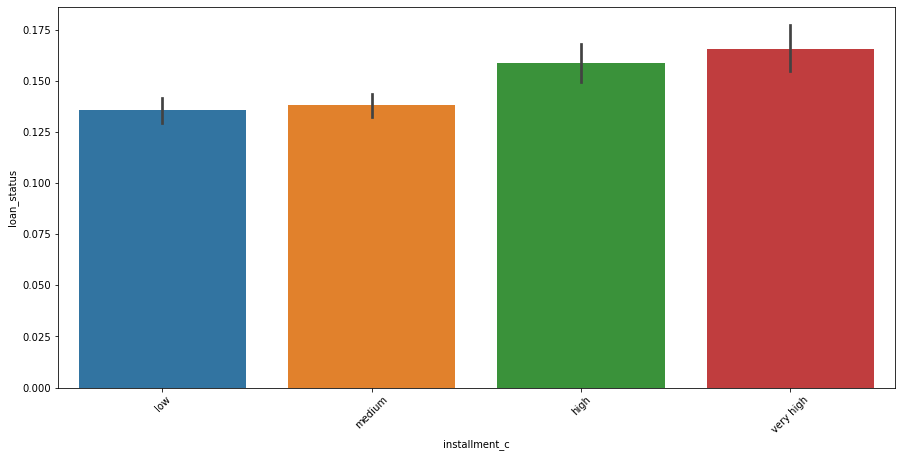

In [55]:
bar_plot(df2,'installment_c','loan_status')

**Interpretation:** With higher number of installments, there is higher risk of getting defaults.

### Annual Income

In [56]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n <=100000:
        return 'medium'
    elif n <=150000:
        return 'high'
    else:
        return 'very high'

df2['annual_inc_c'] = df2['annual_inc'].apply(lambda x: annual_income(x))

# Print the updated DataFrame
print(df2['annual_inc_c'].value_counts())

medium       17433
low          14678
high          3963
very high     1470
Name: annual_inc_c, dtype: int64


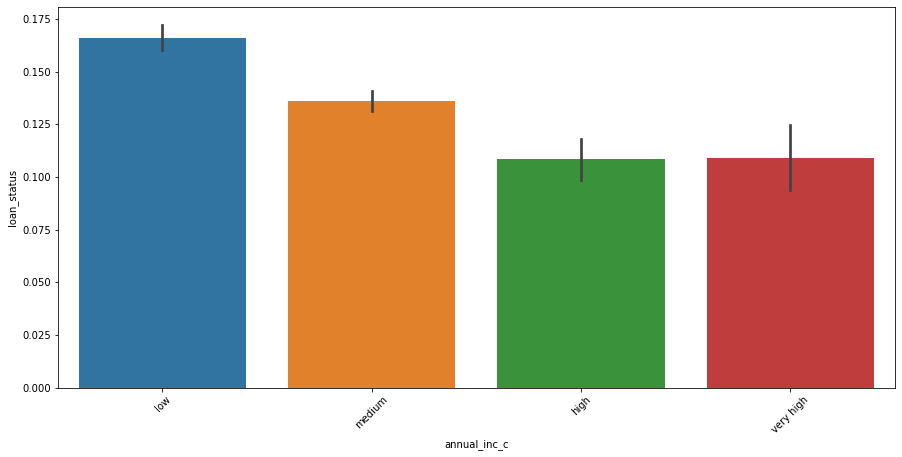

In [57]:
bar_plot(df2,'annual_inc_c','loan_status')

**Interpretation:** It's obvious that with low income there is higher chances of getting defaults.

### Employment Length

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


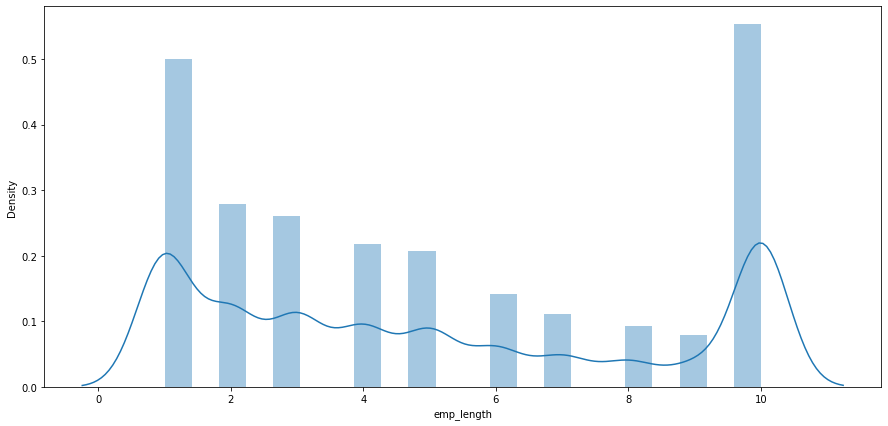

In [58]:
sns.distplot(df2['emp_length'])
plt.show()

In [59]:
# dropping the missing value observations in emp_length
df2 = df2[~df2['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'Fresher'
    elif n <=3:
        return 'Mid-Senior'
    elif n <=6:
        return 'Senior'
    else:
        return 'Team Lead'

df2['emp_length_c'] = df2['emp_length'].apply(lambda x: emp_length(x))

# Print the updated DataFrame
print(df2['emp_length_c'].value_counts())

Team Lead     12860
Senior         8704
Mid-Senior     8303
Fresher        7677
Name: emp_length_c, dtype: int64


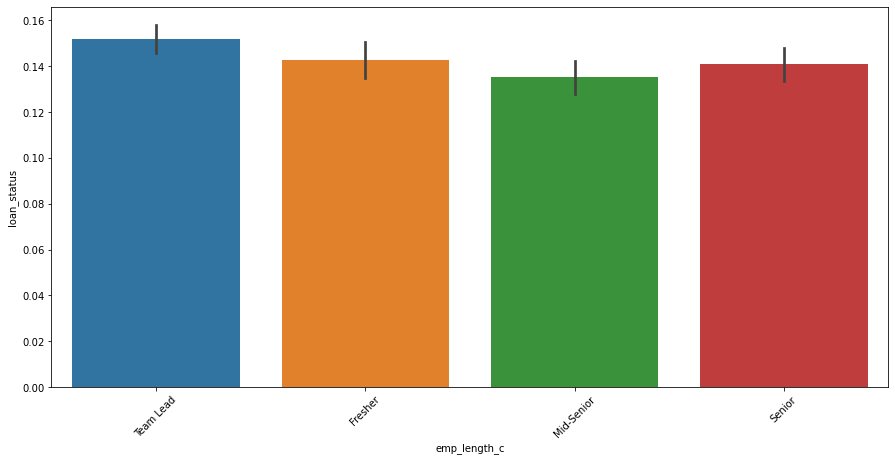

In [60]:
bar_plot(df2,'emp_length_c','loan_status')

**Interpretation:** There is not any significant indication from the length of employment category.

### DTI Ratio

The Debt-to-Income (DTI) ratio is a financial metric used to measure the percentage of a person's monthly income that goes towards debt payments, including mortgage, car loans, credit cards, and other debts. Lenders use the DTI ratio to assess a borrower's ability to repay a loan, and it is an important factor when applying for a mortgage or other types of loans.

The DTI ratio is calculated by dividing the total monthly debt payments by the total monthly income. For example, if a person's monthly debt payments are Rs.500 and their monthly income is Rs. 5,000, their DTI ratio would be 10% (500/5000 = 0.1). Typically, lenders prefer a DTI ratio of 36% or lower, although this can vary depending on the lender and the type of loan.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


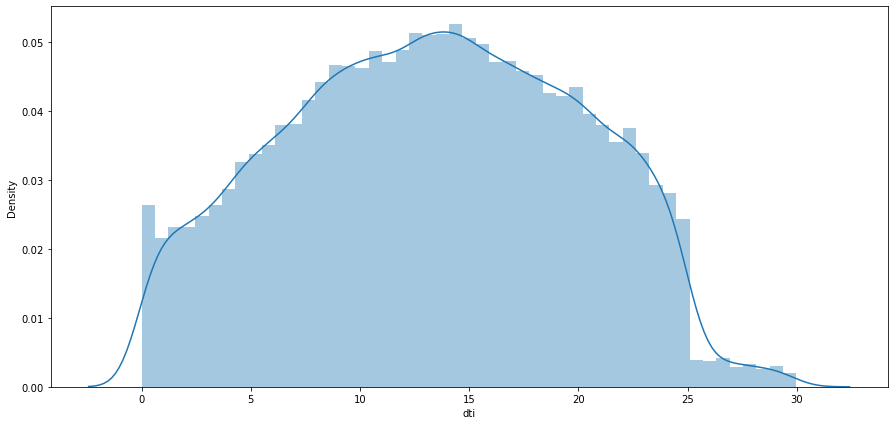

In [61]:
sns.distplot(df2['dti'])
plt.show()

In [62]:
def dti(n):
    if n <= 10:
        return 'Low'
    elif n <=20:
        return 'Medium'
    else:
        return 'High'
    

df2['dti_c'] = df2['dti'].apply(lambda x: dti(x))

# Print the updated DataFrame
print(df2['dti_c'].value_counts())

Medium    18002
Low       12545
High       6997
Name: dti_c, dtype: int64


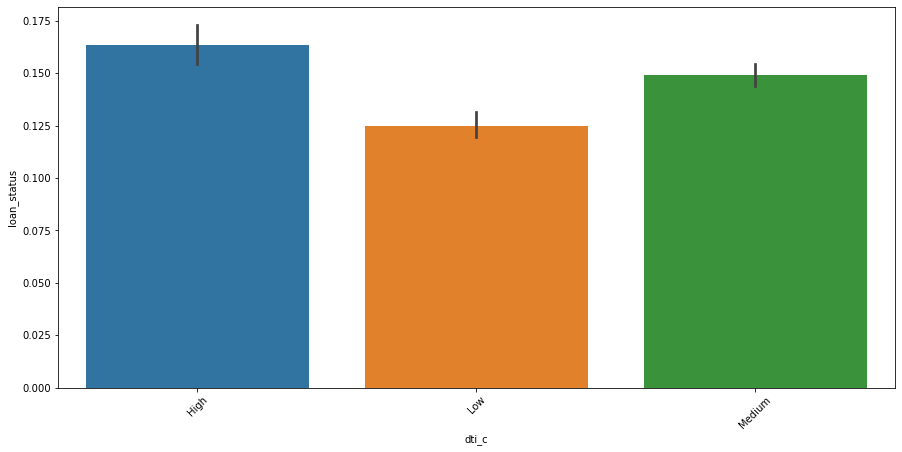

In [63]:
bar_plot(df2,'dti_c','loan_status')

**Interpretattion:** Higher the dti-ratio, higher is the chance of getting defaults.

<a id="8"> </a>
# Segmented Univariate Analysis

Segmented univariate analysis is a statistical technique used to analyze data in subgroups or segments, rather than analyzing the data as a whole. The purpose of segmented univariate analysis is to gain insights into how different factors affect a particular variable or outcome.

In [64]:
df2['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

<AxesSubplot:>

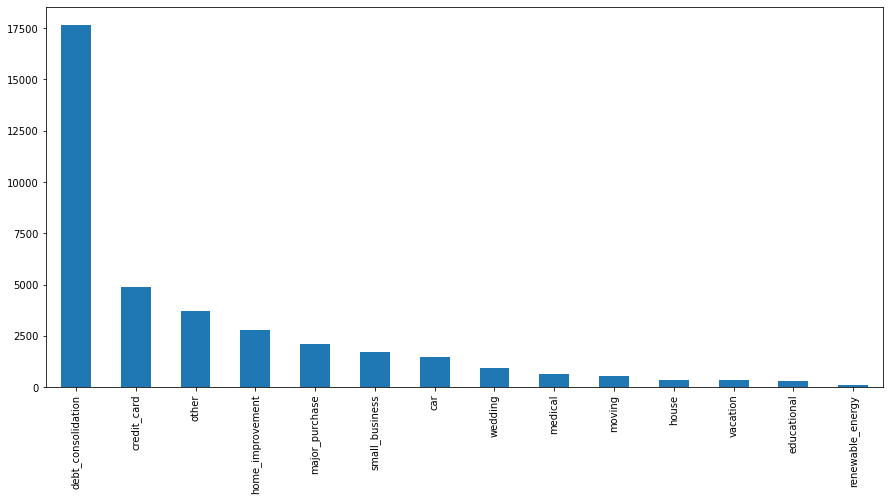

In [65]:
df2['purpose'].value_counts().plot(kind='bar')

Taking the top 5 purposes for taking the loan (ignoring 'Other' category).
- debt_consolidation    
- credit_card            
- home_improvement       
- major_purchase         
- small_business

In [66]:
top5_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"]
df2 = df2[df2['purpose'].isin(top5_purposes)]

In [67]:
# defining function to segment by purpose 
def segmented_plot(df,var1,var2,var3):
    plt.rcParams['figure.figsize']=(15,7)
    sns.barplot(x=var1, y=var2, hue=var3, data=df)
    # Add labels and a legend
    plt.title('{} Vs {} based on top 5 purpose'.format(var1,var2))
    plt.legend(title='Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

### Grade

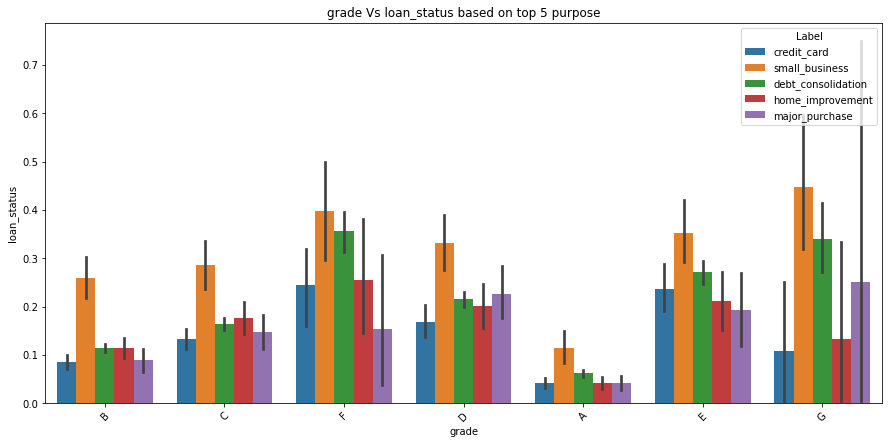

In [68]:
segmented_plot(df2,'grade','loan_status','purpose')

**Interpretation:** Straight lines on the plot show that the default ratio rises for every purpose relative to grade.

### Home Ownership

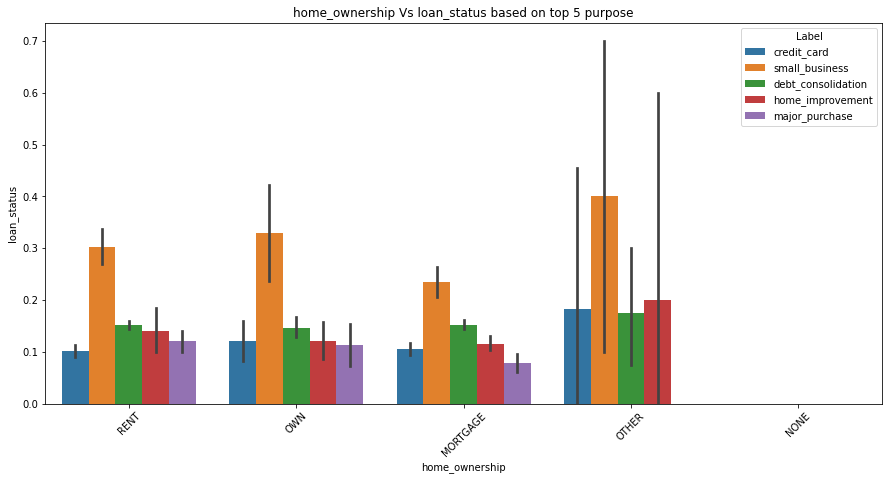

In [69]:
segmented_plot(df2,'home_ownership','loan_status','purpose')

**Interpretation:** Default ratio is highest for 'OTHER' category

### Verification Status

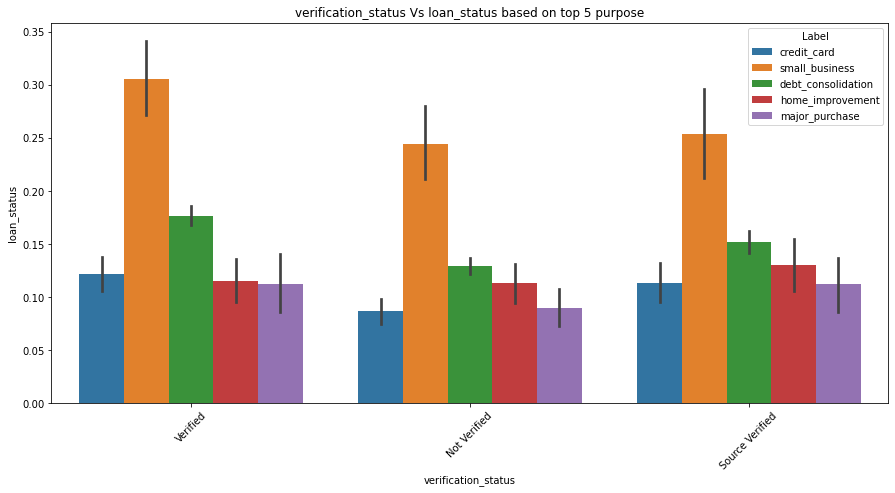

In [70]:
segmented_plot(df2,'verification_status','loan_status','purpose')

**Interpretation:** Default ratio is highest for the Verified profile. Need to ammend new rules for verification process.

### Loan Amount

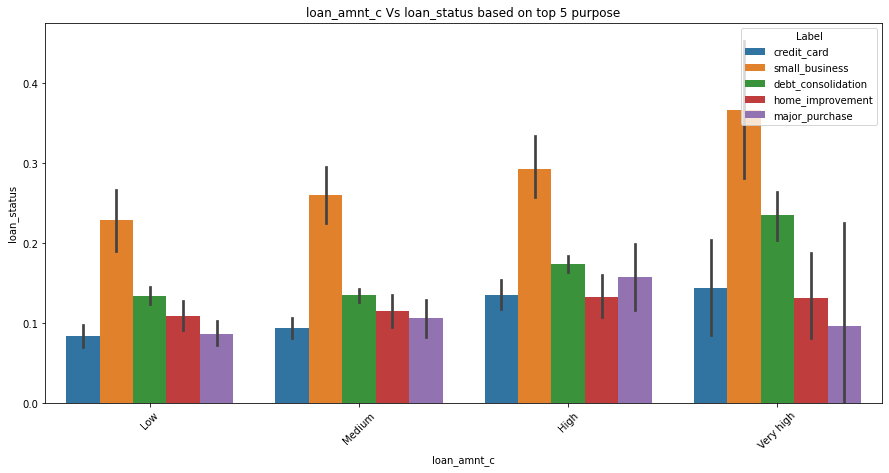

In [71]:
segmented_plot(df2,'loan_amnt_c','loan_status','purpose')

**Interpretation:** For very high loan amount higher is the chances of getting default.

### Funded Amount

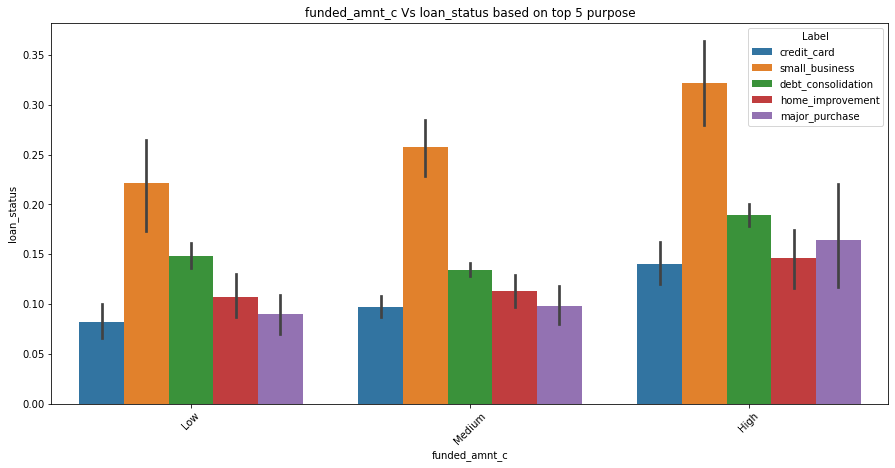

In [72]:
segmented_plot(df2,'funded_amnt_c','loan_status','purpose')

**Interpretation:** For high funded amount, higher is the chance of getting default.

### Interest Rate

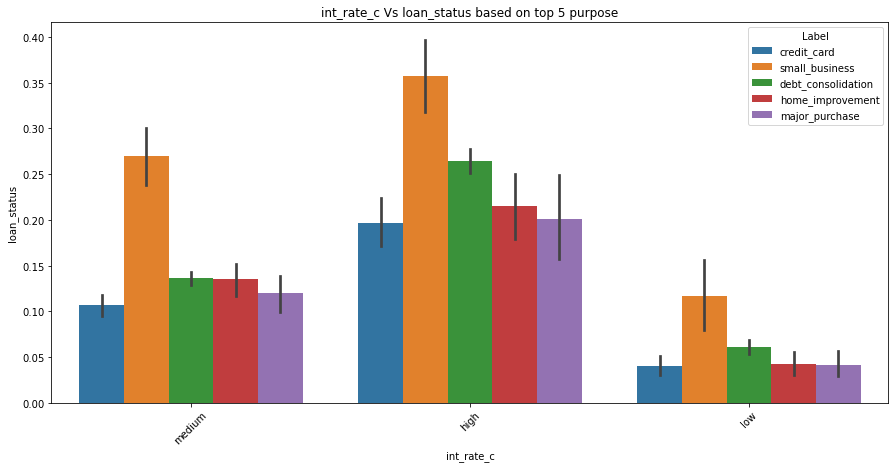

In [73]:
segmented_plot(df2,'int_rate_c','loan_status','purpose')

**Interpretation:** With High Interest rate, higher is the chance of getting default.

### Installment

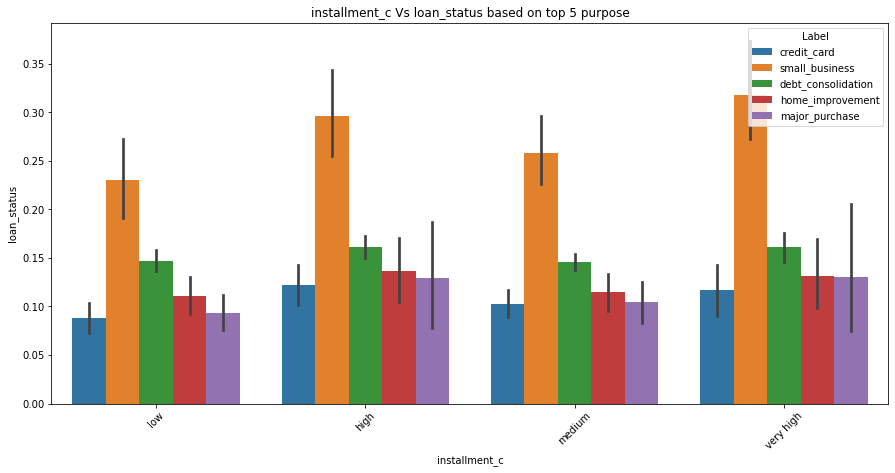

In [74]:
segmented_plot(df2,'installment_c','loan_status','purpose')

**Interpretation:** With very high installments higher is the chance of default.

### Annual Income

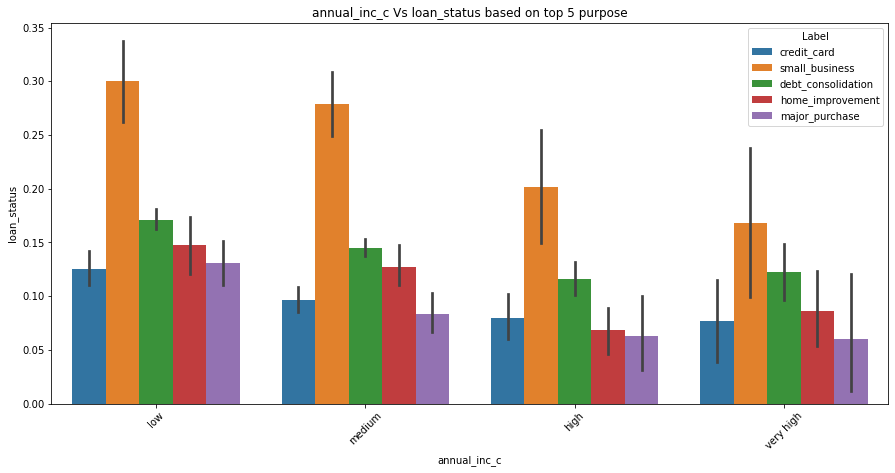

In [75]:
segmented_plot(df2,'annual_inc_c','loan_status','purpose')

**Interpretation:** Lower the annual income, higher is the chances of getting default.

### Employment Length

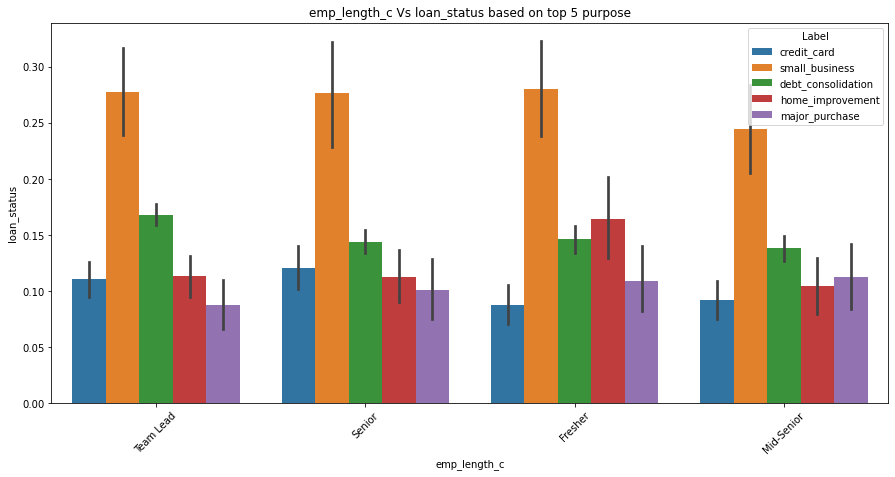

In [76]:
segmented_plot(df2,'emp_length_c','loan_status','purpose')

**Interpretation:** No significant output or results.

### DTI Ratio

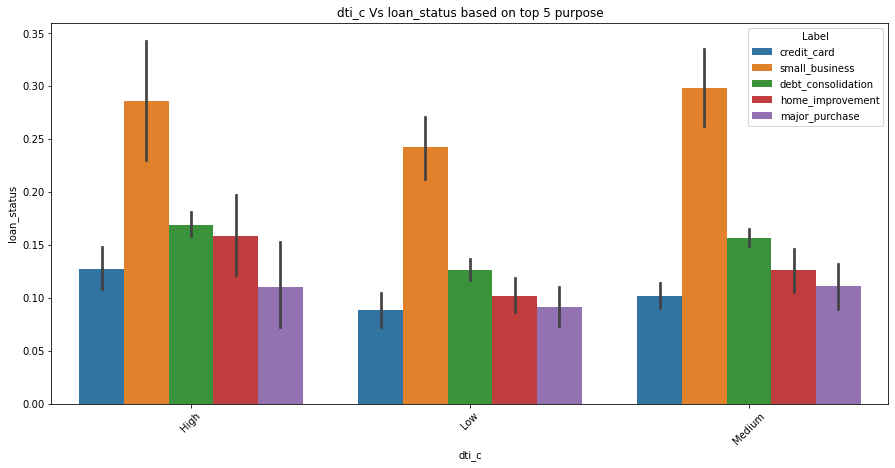

In [77]:
segmented_plot(df2,'dti_c','loan_status','purpose')

**Interpretation:** For the medium DTI Ratio in category of Small business has high risk of default and for rest other categories it is riskier in High DTI Ratio.

<a id="9"> </a>
# Bivariate Analysis

In [93]:
def bivariate(df,v1,v2,hue):
    sns.boxplot(x=v1, y=v2, data=df, hue=hue)
    plt.legend(title=hue, loc='upper right')
    plt.show()

### Term Vs Interest Rate

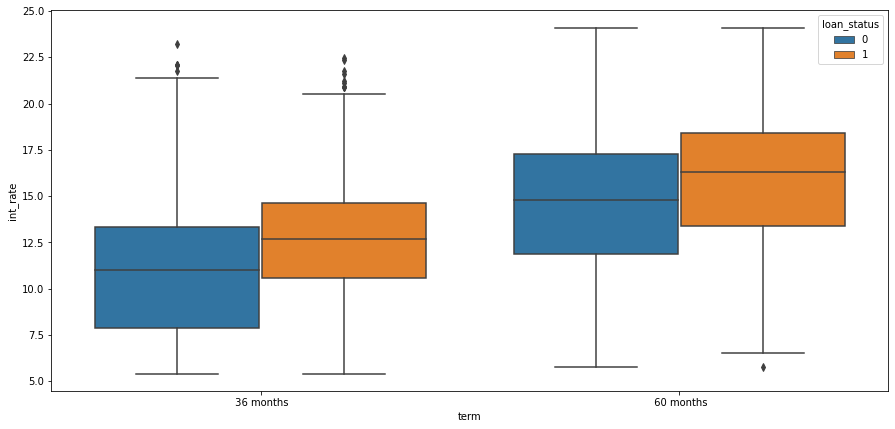

In [94]:
bivariate(df2,'term','int_rate','loan_status')

**Interpretation:** As the interest rate increases with term on loan, the chances of default also increases

### Month Vs Interest Rate

In [79]:
# extracting month and year from issue_date
df2['month'] = df2['issue_d'].apply(lambda x: x.month)
df2['year'] = df2['issue_d'].apply(lambda x: x.year)

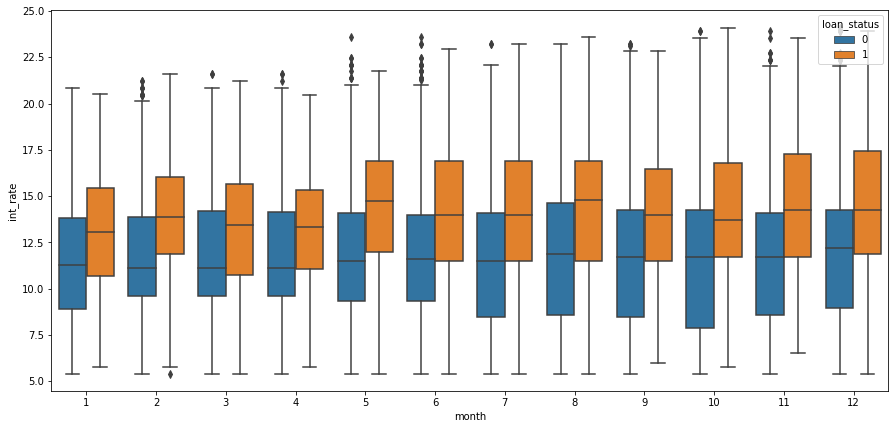

In [95]:
bivariate(df2,'month','int_rate','loan_status')

**Interpretation:** Every month, the defaulter interest rate rises, with the median interest rate for defaulters being close to the 75% quantile for non-defaulters.

### Grade Vs Interest Rate

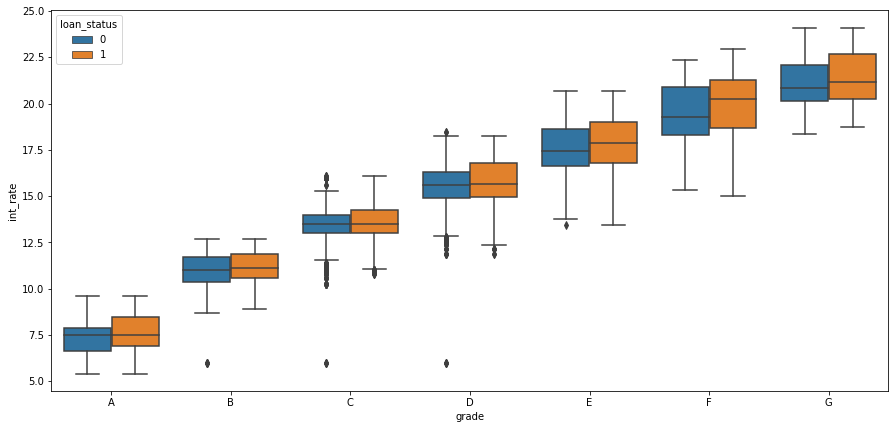

In [84]:
order = ['A','B','C','D','E','F','G']
sns.boxplot(x='grade', y='int_rate', data=df2, hue='loan_status',order=order)
plt.show()

**Interpretation:** Every grade has a growing interest rate, which means where the risk of default is more the interest rate is also the more.

### Purpose Vs DTI

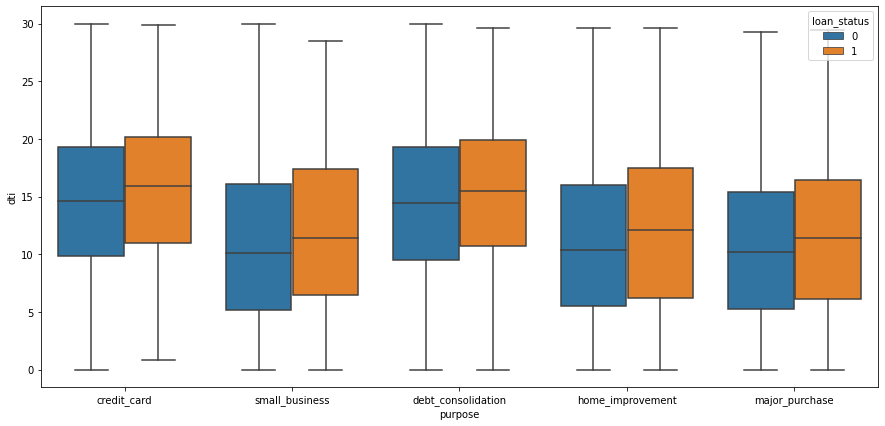

In [96]:
bivariate(df2,'purpose','dti','loan_status')

**Interpretation:** When the dti ratio is more, higher is the chance of getting loans defaulter. It is one of the key metric weather to provide a loan or not.

### Purpose Vs Interest Rate

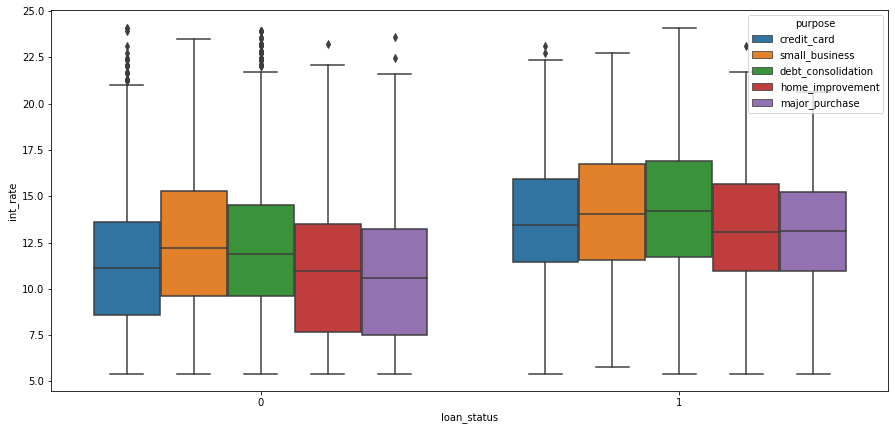

In [97]:
bivariate(df2,'loan_status','int_rate','purpose')

**Interpretation:** Where the loan is in default, the interest rate is fairly large for each purpose value.

## END